# A first example of using TensorFlow

First we need to import Tensorflow. 
Make sure it is installed (with "pip -install tensorflow") 

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
#print the version and make sure everything works.
print ("Tensorflow version "+str(tf.__version__))

Tensorflow version 1.4.0


Let us try to do something simple and just use Tensorflow as a calculator!

In [17]:
#define two variables and initialize them to 3 and 4.
x = tf.Variable(3,name="x")
y = tf.Variable(4,name="y")
#define a function
f = x*x*y+y+2

init = tf.global_variables_initializer()
session = tf.InteractiveSession()
init.run()
result = f.eval()

print("result: "+str(result))  # should give 42 - the answer to everything

result: 42


Okay, let's do something more advanced - regression. 
Finding the best linear model to fit our data.

In [18]:
# Model parameters - initialize to something
a = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output - x will be our input
x = tf.placeholder(tf.float32)
linear_model = a*x + b   # the model we are trying to find the best value of a and b for our data
# y will be our output
y = tf.placeholder(tf.float32)

#define the loss function we want to minimize - i.e. make the error as small as possible while training
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares of the difference
# optimizer - use gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss)

Now we are ready to feed some data into the training model

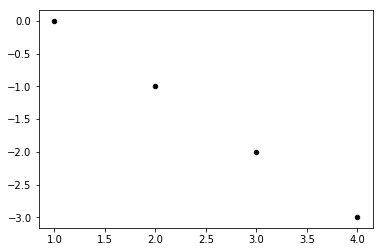

In [19]:
# training data - - in this example they fit perfectly to the model : y = -1 * x + 1 (a straigth line)
# so we should in an optimal training situation be able to achieve an error of 0 in theory.
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # set values to our initialials

#let us just plot the input data to see how the points look like
plt.figure() # creating a new figure
plt.scatter(x_train, y_train, color='black', s=20)  # pl
plt.show()

As we expect the training data should lie on a straight linefollowing the line
defined as y = -1*x +1.
Now everything is initialized and we are ready to train our model - we will also save some data for each training iteration,  in order to see any improvements

In [20]:
#the error - which should decrease
error = []
# the slope (a value)
slope = []
#constant - b value
bvalue = []
# training - 1000 iterations
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train}) # train using our data - and minimize the loss function
    curr_a, curr_b, curr_loss = sess.run([a, b, loss], {x: x_train, y: y_train})
    error.append(curr_loss)
    slope.append(curr_a)
    bvalue.append(curr_b)


Now we can print the result of each training iteration in a graph. Notice how the a and b value converge to what we expected and also note how the error approaches 0.

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


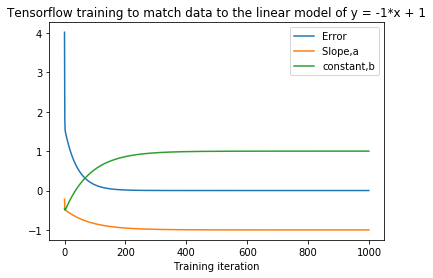

In [21]:
print("W: %s b: %s loss: %s"%(curr_a, curr_b, curr_loss))
session.close()
plt.figure()
plt.plot(error,label='Error')
plt.plot(slope,label='Slope,a ')
plt.plot(bvalue,label='constant,b')
plt.legend()
plt.title("Tensorflow training to match data to the linear model of y = -1*x + 1")
plt.xlabel("Training iteration")
plt.show()